In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:

# Definir rutas de archivos CSV
ruta_csv_2022 = 'activaciones_samur_2022.csv'
ruta_csv_2023 = 'activaciones_samur_2023.csv'
ruta_csv_2024 = 'activaciones_samur_2024.csv'

# Cargar datos
df_2022 = pd.read_csv(ruta_csv_2022, sep=';')
df_2023 = pd.read_csv(ruta_csv_2023, sep=';')
df_2024 = pd.read_csv(ruta_csv_2024, sep=';')

# Filtrar agresiones
df_agresiones_2022 = df_2022[df_2022["Código"].isin(["Agresión sin especificar", "Agresión con spray de defensa"])]
df_agresiones_2023 = df_2023[df_2023["Código"].isin(["Agresión sin especificar", "Agresión con spray de defensa"])]
df_agresiones_2024 = df_2024[df_2024["Código"].isin(["Agresión sin especificar", "Agresión con spray de defensa"])]


In [3]:

# Seleccionamos las columnas relevantes
df_sel = df_agresiones_2022[["Distrito", "Mes"]]
# Agrupamos por distrito y mes, y contamos las filas (sobredosis)
df_agrupado_22 = df_sel.groupby(["Distrito", "Mes"]).size().to_frame(name="Número de agresiones")

# Desordenamos el DataFrame por número de sobredosis de mayor a menor
df_agrupado_22 = df_agrupado_22.sort_values(by=["Número de agresiones"], ascending=False)

# Mostramos el DataFrame
print(df_agrupado_22) #Si quieres que te muesrte todo, le pones un .to_string


                           Número de agresiones
Distrito          Mes                          
CENTRO            MARZO                     132
                  ENERO                     127
                  ABRIL                     126
                  FEBRERO                    89
VALLECAS PTE.     MARZO                      74
...                                         ...
VICALVARO         MAYO                        2
VILLA DE VALLECAS MAYO                        2
BARAJAS           ABRIL                       2
                  MAYO                        1
VILLAVERDE        MAYO                        1

[104 rows x 1 columns]


In [4]:

# Seleccionamos las columnas relevantes
df_sel_23 = df_agresiones_2023[["Distrito", "Mes"]]

# Agrupamos por distrito y mes, y contamos las filas (sobredosis)
df_agrupado_23 = df_sel_23.groupby(["Distrito", "Mes"]).size().to_frame(name="Número de agresiones")

# Desordenamos el DataFrame por número de sobredosis de mayor a menor
df_agrupado_23 = df_agrupado_23.sort_values(by=["Número de agresiones"], ascending=False)

# Mostramos el DataFrame
print(df_agrupado_23) #Si quieres que te muesrte todo, le pones un .to_string

                    Número de agresiones
Distrito Mes                            
CENTRO   OCTUBRE                     174
         AGOSTO                      162
         JULIO                       158
         MAYO                        154
         DICIEMBRE                   152
...                                  ...
BARAJAS  FEBRERO                       3
         OCTUBRE                       3
         ENERO                         2
         AGOSTO                        2
         ABRIL                         1

[252 rows x 1 columns]


In [5]:

# Seleccionamos las columnas relevantes
df_sel_24 = df_agresiones_2024[["Distrito", "Mes"]]

# Agrupamos por distrito y mes, y contamos las filas (sobredosis)
df_agrupado_24 = df_sel_24.groupby(["Distrito", "Mes"]).size().to_frame(name="Número de agresiones")

# Desordenamos el DataFrame por número de sobredosis de mayor a menor
df_agrupado_24 = df_agrupado_24.sort_values(by=["Número de agresiones"], ascending=False)

# Mostramos el DataFrame
print(df_agrupado_24.to_string()) #Si quieres que te muesrte todo, le pones un .to_string()

                           Número de agresiones
Distrito          Mes                          
CENTRO            ENERO                     152
                  FEBRERO                   124
                  MARZO                     113
VALLECAS PTE.     MARZO                      74
                  FEBRERO                    71
CARABANCHEL       MARZO                      68
VALLECAS PTE.     ENERO                      62
USERA             MARZO                      61
                  ENERO                      56
CARABANCHEL       FEBRERO                    54
                  ENERO                      50
TETUAN            MARZO                      50
                  ENERO                      46
                  FEBRERO                    41
ARGANZUELA        MARZO                      40
USERA             FEBRERO                    40
CIUDAD LINEAL     FEBRERO                    36
                  MARZO                      36
CHAMBERI          MARZO                 

In [6]:

# Unir DataFrames
df_agresiones_total = pd.concat([df_agresiones_2022, df_agresiones_2023, df_agresiones_2024])

# Análisis por distrito y mes
df_agrupado = df_agresiones_total.groupby(["Distrito", "Mes"]).size().to_frame(name="Número de agresiones")
df_agrupado = df_agrupado.sort_values(by=["Número de agresiones"], ascending=False)

# Visualización
print(df_agrupado) # Muestra el DataFrame con los datos agrupados
#print(df_agrupado.to_string()) # Muestra todos los datos del DataFrame agrupado
# Unir DataFrames

df_agresiones_total = pd.concat([df_agresiones_2022, df_agresiones_2023, df_agresiones_2024])
print(df_agresiones_total)


                         Número de agresiones
Distrito      Mes                            
CENTRO        ENERO                       394
              MARZO                       377
              FEBRERO                     292
              ABRIL                       272
VALLECAS PTE. MARZO                       212
...                                       ...
BARAJAS       JULIO                         5
              NOVIEMBRE                     5
              ABRIL                         3
              OCTUBRE                       3
              AGOSTO                        2

[252 rows x 1 columns]
        Año    Mes Hora Solicitud Hora Intervención                    Código  \
31     2022  ENERO        2:27:51           2:35:00  Agresión sin especificar   
48     2022  ENERO        3:31:15           3:38:51  Agresión sin especificar   
51     2022  ENERO        3:36:36               NaN  Agresión sin especificar   
62     2022  ENERO        4:23:20           4:30:22  A

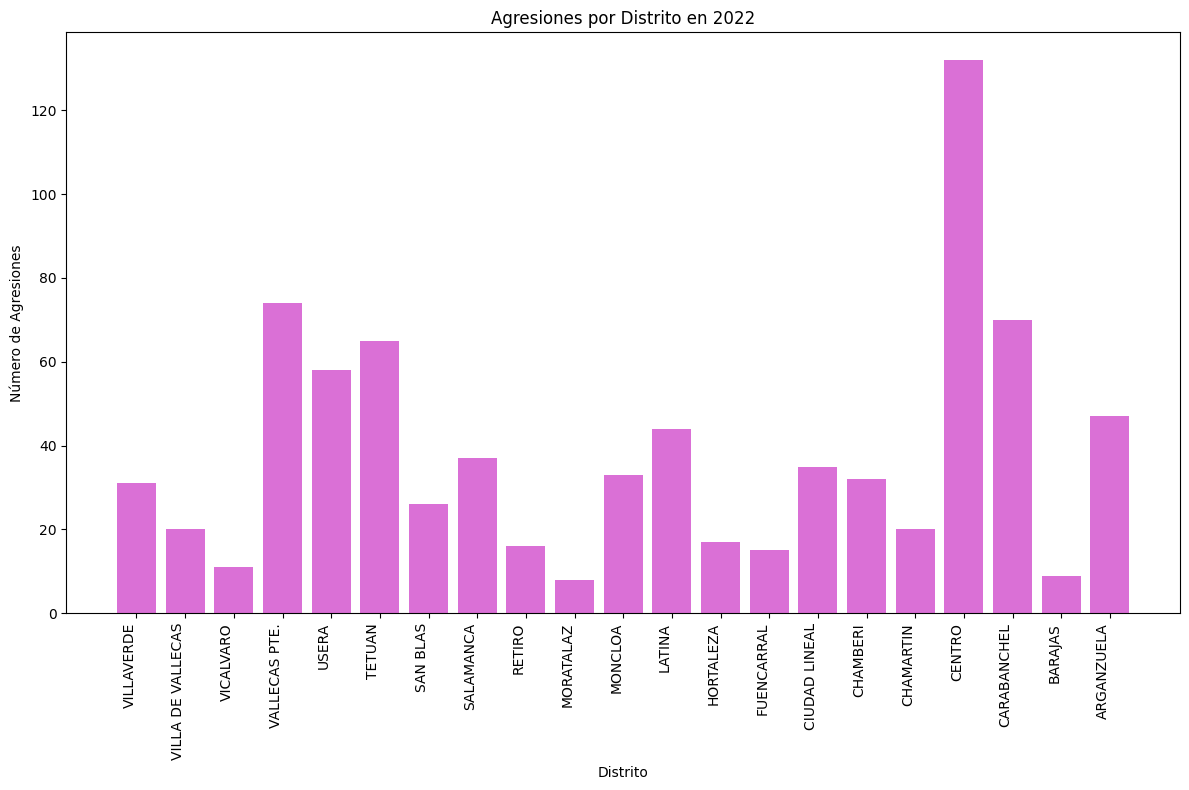

In [7]:
# Create a new DataFrame to store the aggregated data
df_agg_distritos_2022 = df_agresiones_2022.groupby(['Distrito', 'Mes']).size().to_frame(name='Número de Agresiones').reset_index()

# Sort the DataFrame by 'Distrito' and 'Número de Agresiones'
df_agg_distritos_2022 = df_agg_distritos_2022.sort_values(by=['Distrito', 'Número de Agresiones'], ascending=False)

# Create the bar graph
plt.figure(figsize=(12, 8))
plt.bar(df_agg_distritos_2022['Distrito'], df_agg_distritos_2022['Número de Agresiones'], color='orchid')
plt.xlabel('Distrito')
plt.ylabel('Número de Agresiones')
plt.title('Agresiones por Distrito en 2022')
plt.xticks(rotation=45, ha='right')  # Rotate district labels for better readability

# Rotate the x-axis labels if there are too many districts
if len(df_agg_distritos_2022['Distrito'].unique()) > 15:
    plt.xticks(rotation=90)  # Rotate labels vertically

plt.tight_layout()
plt.show()


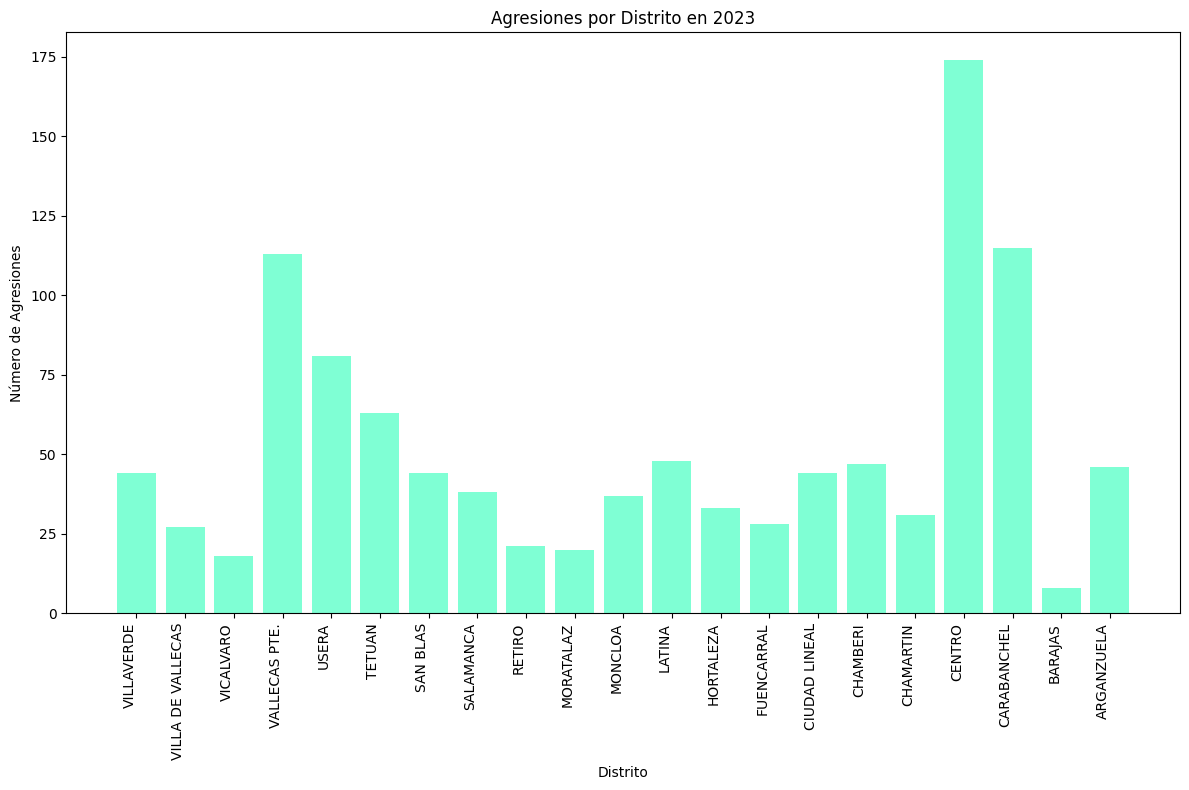

In [8]:
# Create a new DataFrame to store the aggregated data
df_agg_distritos_2023 = df_agresiones_2023.groupby(['Distrito', 'Mes']).size().to_frame(name='Número de Agresiones').reset_index()

# Sort the DataFrame by 'Distrito' and 'Número de Agresiones'
df_agg_distritos_2023 = df_agg_distritos_2023.sort_values(by=['Distrito', 'Número de Agresiones'], ascending=False)

# Create the bar graph
plt.figure(figsize=(12, 8))
plt.bar(df_agg_distritos_2023['Distrito'], df_agg_distritos_2023['Número de Agresiones'], color='aquamarine')
plt.xlabel('Distrito')
plt.ylabel('Número de Agresiones')
plt.title('Agresiones por Distrito en 2023')
plt.xticks(rotation=45, ha='right')  # Rotate district labels for better readability

# Rotate the x-axis labels if there are too many districts
if len(df_agg_distritos_2023['Distrito'].unique()) > 15:
    plt.xticks(rotation=90)  # Rotate labels vertically

plt.tight_layout()
plt.show()


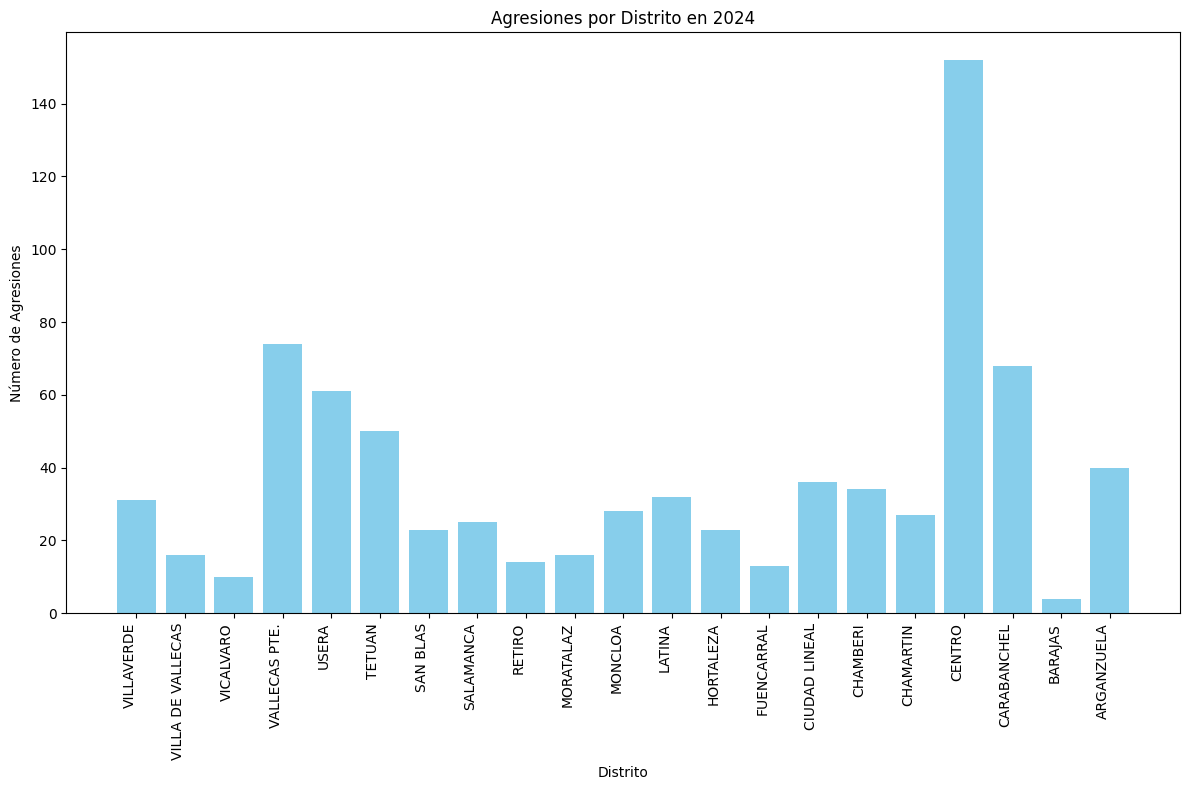

In [9]:
# Create a new DataFrame to store the aggregated data
df_agg_distritos_2024 = df_agresiones_2024.groupby(['Distrito', 'Mes']).size().to_frame(name='Número de Agresiones').reset_index()

# Sort the DataFrame by 'Distrito' and 'Número de Agresiones'
df_agg_distritos_2024 = df_agg_distritos_2024.sort_values(by=['Distrito', 'Número de Agresiones'], ascending=False)

# Create the bar graph
plt.figure(figsize=(12, 8))
plt.bar(df_agg_distritos_2024['Distrito'], df_agg_distritos_2024['Número de Agresiones'], color='skyblue')
plt.xlabel('Distrito')
plt.ylabel('Número de Agresiones')
plt.title('Agresiones por Distrito en 2024')
plt.xticks(rotation=45, ha='right')  # Rotate district labels for better readability

# Rotate the x-axis labels if there are too many districts
if len(df_agg_distritos_2024['Distrito'].unique()) > 15:
    plt.xticks(rotation=90)  # Rotate labels vertically

plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

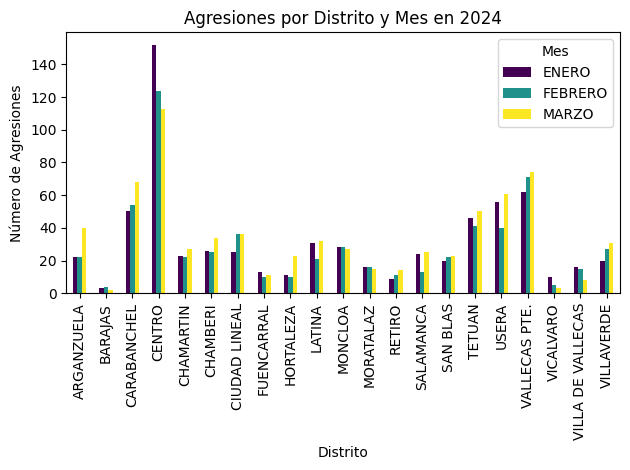

In [10]:
# Create a new DataFrame to store the aggregated data
df_agg_distritos_meses_2024 = df_agresiones_2024.groupby(['Distrito', 'Mes']).size().to_frame(name='Número de Agresiones').reset_index()

# Create a pivot table to group by month and calculate total aggressions
df_pivot_meses = df_agg_distritos_meses_2024.pivot_table(index='Distrito', columns='Mes', values='Número de Agresiones', aggfunc=np.sum)

# Create the multi-line bar graph
plt.figure(figsize=(15, 10))
df_pivot_meses.plot(kind='bar', stacked=False, colormap='viridis')
plt.xlabel('Distrito')
plt.ylabel('Número de Agresiones')
plt.title('Agresiones por Distrito y Mes en 2024')
plt.legend(title='Mes')  # Add a legend for each month

# Rotate the x-axis labels if there are too many districts
if len(df_agg_distritos_meses_2024['Distrito'].unique()) > 15:
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

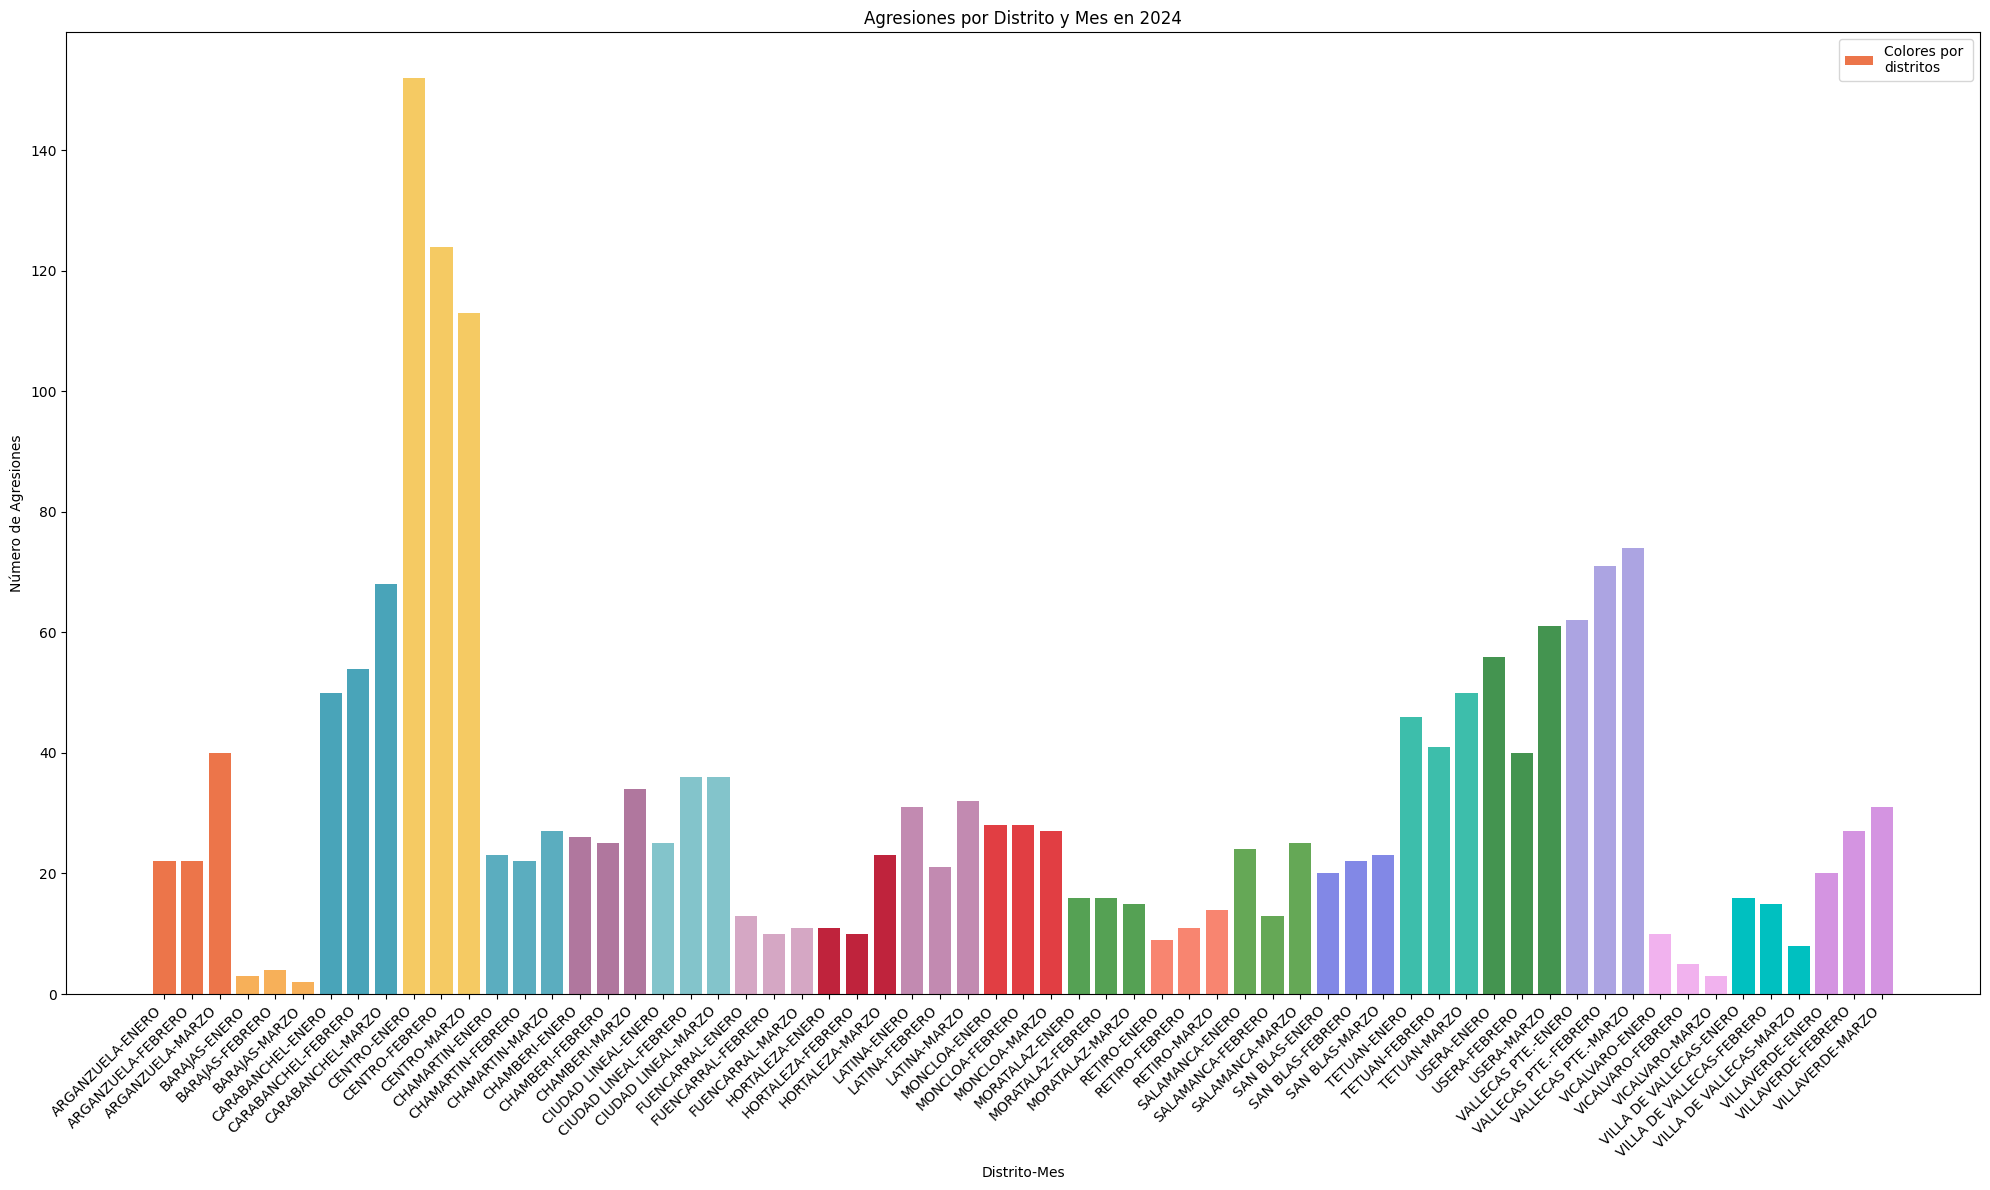

In [11]:


# Create a new DataFrame to store the aggregated data
df_agg_distritos_meses_2024 = df_agresiones_2024.groupby(['Distrito', 'Mes']).size().to_frame(name='Número de Agresiones').reset_index()

# Reshape the data to have district-month combinations as the index
df_agg_distritos_meses_2024['Distrito-Mes'] = df_agg_distritos_meses_2024['Distrito'] + '-' + df_agg_distritos_meses_2024['Mes']
df_agg_distritos_meses_2024.set_index('Distrito-Mes', inplace=True)
colors = ['#EC754A','#EC754A','#EC754A','#F7B059','#F7B059','#F7B059','#49A4B9','#49A4B9','#49A4B9','#F5CA63','#F5CA63','#F5CA63','#5BADBF','#5BADBF','#5BADBF','#B0779E','#B0779E','#B0779E','#83C4CB','#83C4CB','#83C4CB','#D5A7C4','#D5A7C4','#D5A7C4','#BF233C','#BF233C','#BF233C','#C28AB1','#C28AB1','#C28AB1','#E13E43','#E13E43','#E13E43','#55A154','#55A154','#55A154','#F88570','#F88570','#F88570','#65A856','#65A856','#65A856','#8288E6','#8288E6','#8288E6','#3DBEAB','#3DBEAB','#3DBEAB','#449450','#449450','#449450','#ACA4E2','#ACA4E2','#ACA4E2','#F1B2EE','#F1B2EE','#F1B2EE','#00C0C0','#00C0C0','#00C0C0','#D494E1','#D494E1','#D494E1']
# Create the bar graph
plt.figure(figsize=(20, 12))  # Aumentar el tamaño de la figura
plt.bar(df_agg_distritos_meses_2024.index, df_agg_distritos_meses_2024['Número de Agresiones'], color=colors,label='Colores por \ndistritos')
plt.xlabel('Distrito-Mes')
plt.ylabel('Número de Agresiones')
plt.title('Agresiones por Distrito y Mes en 2024')
plt.legend()


# Rotate the x-axis labels if necessary
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar etiquetas a 45 grados y ajustar el tamaño de fuente

# Adjust layout
plt.tight_layout()  # Ajustar automáticamente los márgenes
# También puedes usar plt.subplots_adjust si tight_layout no es suficiente:
# plt.subplots_adjust(bottom=0.2)  # Ajustar margen inferior

plt.show()



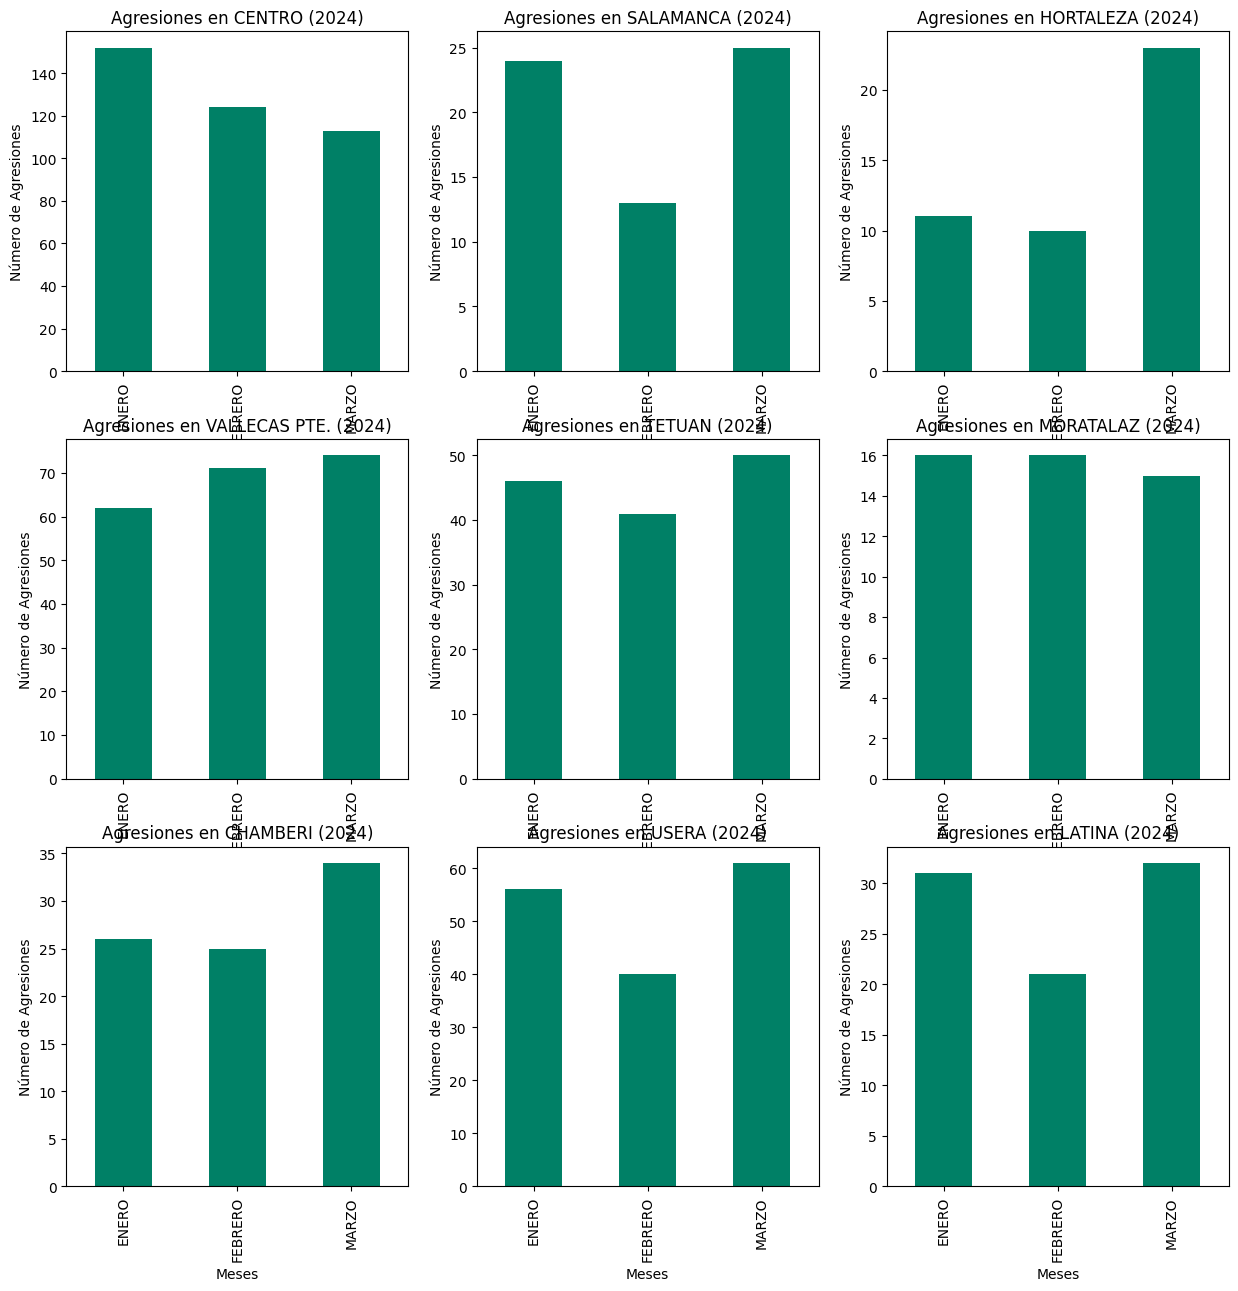

<class 'IndexError'>: index 3 is out of bounds for axis 0 with size 3

In [12]:
import matplotlib.pyplot as plt

# Get unique districts
distritos_unicos = df_agresiones_2024['Distrito'].unique()

# Create a figure to hold multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate through each district and create a subplot for each
for i, distrito in enumerate(distritos_unicos):
    # Filter data for the current district
    df_distrito = df_agresiones_2024[df_agresiones_2024['Distrito'] == distrito]

    # Create a subplot for the current district
    ax = axes[i // 3, i % 3]  # Calculate subplot position based on index

    # Create the bar graph for the current district
    df_distrito.groupby('Mes')['Código'].count().plot(kind='bar', colormap='summer', ax=ax)

    # Set labels and title for the subplot
    ax.set_xlabel('Meses')
    ax.set_ylabel('Número de Agresiones')
    ax.set_title(f'Agresiones en {distrito} (2024)')
    

# Adjust layout and display the figure
fig.suptitle('Agresiones por Distrito en 2024', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
ge